In [7]:
import numpy as np
import matplotlib.pyplot as plt
from wNMF import wNMF

# Mock setup: Sum of Periodic signals

In [46]:
## An example on simulated data
n = 1001
features = 1000
components = 4

shapes_true = np.array([1 + np.sin(np.arange(features) / 10 / 2**i + np.random.uniform(0, np.pi)) for i in range(components)])
shapes_true[0] = 1
shapes_true[1] = np.exp(-np.arange(features) / 400)



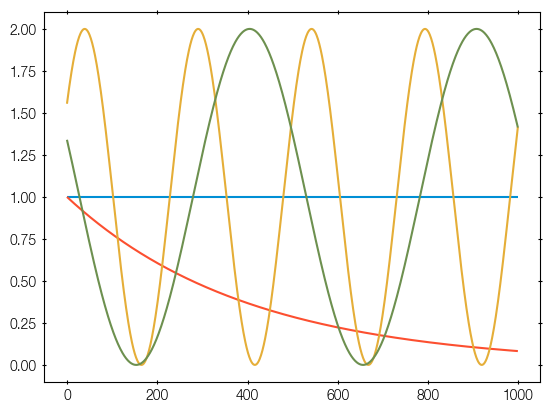

In [47]:
plt.plot(shapes_true.T);

In [59]:
## An example on simulated data
X = 1. * np.random.poisson((1. / np.random.uniform(size=(n, components))) @ shapes_true)
W = np.ones_like(X)

In [60]:
X.shape

(1001, 1000)

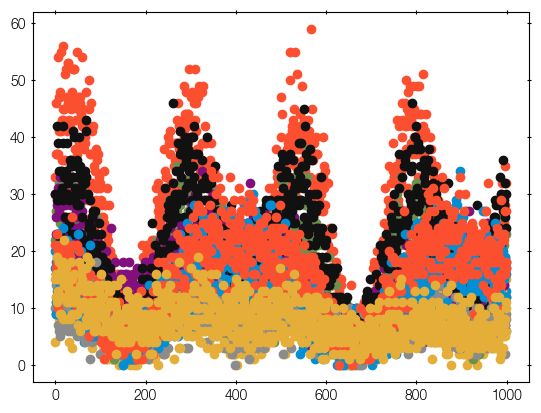

In [61]:
plt.plot(X[:10].T, ls=' ', marker='o');

In [62]:
model = wNMF(n_components=components, beta_loss='kullback-leibler', max_iter=1000, track_error=True, verbose=1)
fit = model.fit(X=X, W=W, n_run=1)

Beginning Run 1...
|--- Initializing U,V
|--- Running wNMF


KeyboardInterrupt: 

In [54]:
fit.V.shape, fit.U.shape

((2, 1000), (1001, 2))

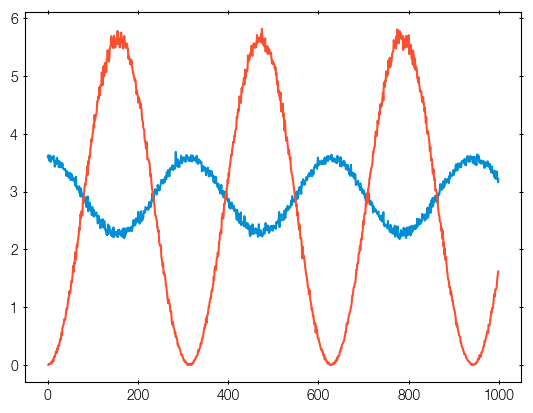

In [55]:
plt.plot(fit.V.T);

In [56]:
print(fit.V)

[[3.61190552e+00 3.59315354e+00 3.62889978e+00 ... 3.23224626e+00
  3.15995115e+00 3.22245590e+00]
 [7.44392412e-03 7.79689642e-05 1.15037991e-02 ... 1.53775928e+00
  1.60760953e+00 1.63507053e+00]]


In [57]:
print(fit.U)

[[0.40764737 0.28612178]
 [0.2787295  0.88233307]
 [0.61551126 0.44979258]
 ...
 [0.37953547 0.48527657]
 [2.64512222 0.77649867]
 [7.61319114 2.59769631]]


In [16]:
import matplotlib.pyplot as plt

In [23]:
len(fit.error_tracker)

5

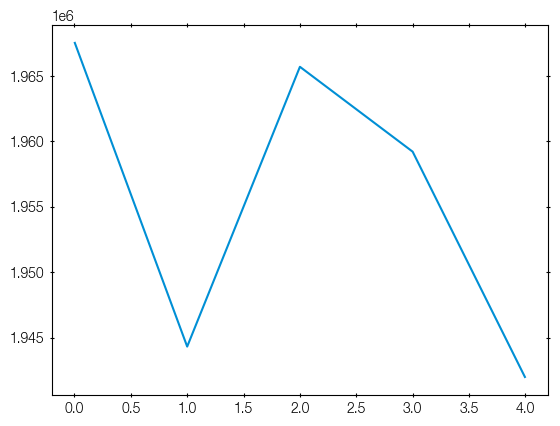

In [22]:
plt.plot(fit.error_tracker)

In [7]:
print(fit.err)

1938074.9164958077


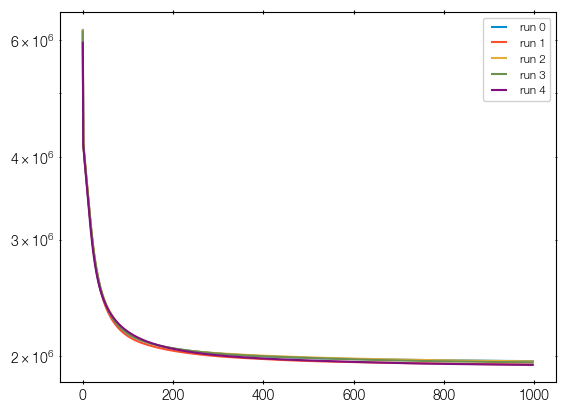

In [29]:
for i, err_tracked in enumerate(fit.error_tracker):
    plt.plot(err_tracked, label=f'run {i}');
plt.yscale('log')
plt.legend();